In [45]:
import os
import json
import numpy as np
import time
import pickle
import pandas as pd
from PIL import Image, ImageDraw
import math
import random
import cv2

from config import Config
import utils

In [2]:
HOME = os.getcwd()
IMAGE_DIR = os.path.join(HOME,"giscle-segmentation/leftImg8bit")
ANN_DIR = os.path.join(HOME,"giscle-segmentation/gtFine")

In [33]:
def image_ann_paths(ret = True, pickle_files = False):
    """creates dictionaries for path to images and annotation files
    optional pickle files can be created
    """
    image_dct = {}
    ann_dct = {}
    for directory in ["train","val","test"]:
        images = []
        ann = []
        image_path = os.path.join(IMAGE_DIR, directory)
        ann_path = os.path.join(ANN_DIR, directory)
        cities = [d for d in os.listdir(image_path)]
        for city in cities:
            print("appending data: {} city from {} directory".format(city,directory))
            city_path = os.path.join(image_path, city)
            city_ann_path = os.path.join(ann_path, city)
            for file in os.listdir(city_path):
                images.append(os.path.join(city_path,file))
                filename = "_".join(file.split("_")[:3])
                filename += "_gtFine_polygons.json"
                ann.append(os.path.join(city_ann_path, filename))
        image_dct[directory] = images
        ann_dct[directory] = ann
        
        if pickle_files:
            pickle.dump(images,open("image_{}.pickle".format(directory), "wb"))
            pickle.dump(ann,open("ann_{}.pickle".format(directory), "wb"))
    if ret:        
        return image_dct, ann_dct

In [35]:
images, annotations = image_ann_paths(pickle_files=True)

appending data: aachen city from train directory
appending data: bochum city from train directory
appending data: bremen city from train directory
appending data: cologne city from train directory
appending data: darmstadt city from train directory
appending data: dusseldorf city from train directory
appending data: erfurt city from train directory
appending data: hamburg city from train directory
appending data: hanover city from train directory
appending data: jena city from train directory
appending data: krefeld city from train directory
appending data: monchengladbach city from train directory
appending data: strasbourg city from train directory
appending data: stuttgart city from train directory
appending data: tubingen city from train directory
appending data: ulm city from train directory
appending data: weimar city from train directory
appending data: zurich city from train directory
appending data: frankfurt city from val directory
appending data: lindau city from val directo

In [28]:
images = pickle.load(open("image_train.pickle", "rb"))
annotations = pickle.load(open("ann_train.pickle", "rb"))
labels = ['bicycle', 'bicyclegroup', 'bridge', 'building', 'bus', 'car',
        'caravan', 'cargroup', 'dynamic', 'ego vehicle', 'fence', 'ground',
          'guard rail', 'license plate', 'motorcycle', 'motorcyclegroup',
          'out of roi', 'parking', 'person', 'persongroup', 'pole',
          'polegroup', 'rail track', 'rectification border', 'rider',
          'ridergroup', 'road', 'sidewalk', 'sky', 'static', 'terrain',
          'traffic light', 'traffic sign', 'trailer', 'train', 'truck',
          'truckgroup', 'tunnel', 'vegetation', 'wall']

In [29]:
len(labels)

40

76


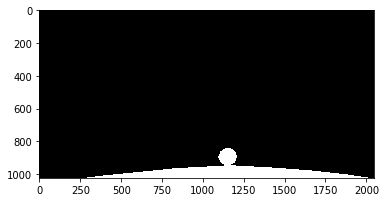

In [58]:
image_path = '/home/object_detection/automagic/Giscle_Mask_RCNN/giscle-segmentation/leftImg8bit/train/erfurt/erfurt_000016_000019_leftImg8bit.png'
#image_path = dataset.image_info[image_id]['path']
image_path = image_path.replace("leftImg8bit","gtFine")
image_path = image_path.replace(".png", "_polygons.json")

dct = json.load(open(image_path,'r'))
num_instances = len(dct['objects'])
print(num_instances)
width = 2048
height = 1024

instance_masks = []
class_ids = []

for i in range(num_instances):
    instance = dct['objects'][i]
    class_ids.append(instance['label'])
    poly = instance['polygon']
    polygon = [tuple(pt) for pt in poly]
    img = Image.new('L', (width, height), 0)
    ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
    mask = np.array(img)
    instance_masks.append(mask)
    
import matplotlib.pyplot as plt
plt.imshow(instance_masks[74], cmap = 'gray')


In [39]:
"/home/object_detection/automagic/Giscle_Mask_RCNN/giscle-segmentation/leftImg8bit/train/erfurt/erfurt_000016_000019_leftImg8bit.png".replace("leftImg8bit","gtFine")

'/home/object_detection/automagic/Giscle_Mask_RCNN/giscle-segmentation/gtFine/train/erfurt/erfurt_000016_000019_gtFine.png'

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [ ]:
class CityscapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "cityscapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 40  # background + 3 shapes
    
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 2048
    
config = CityscapesConfig()
config.display()

In [ ]:
class CityscapesDataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """

    def load_cityscapes(self, count, height, width):
        """Generate the requested number of synthetic images.
        count: number of images to generate.
        height, width: the size of the generated images.
        """
        # Add classes
        for class_id, class_name in enumerate(set(labels)):
            self.add_class("cityscapes", i + 1, class_name)

        # Add images
        for i, path in enumerate(images):
            self.add_image("cityscapes", image_id=i, path=path)
            
    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "cityscapes":
            return info["cityscapes"]
        else:
            super(self.__class__).image_reference(self, image_id)
            
    #def load_mask(self, image_id):
        #return mask, image_ids

In [2]:
HOME = os.getcwd()
TRAIN_DIR = os.path.join(HOME,"giscle-segmentation/gtFine/train")
VAL_DIR = os.path.join(HOME,"giscle-segmentation/gtFine/val")
TEST_DIR = os.path.join(HOME,"giscle-segmentation/gtFine/test")

In [3]:
def pickle_data(color_file = "color.pickle", label_file = "labels.pickle", 
                polygon_file = "polygons.pickle"):
    colors = []
    labels = []
    polygons = []
    for directory in [TRAIN_DIR,VAL_DIR,TEST_DIR]:
        cities = [d for d in os.listdir(directory) if d != 'placeholder.txt']
        for city in cities:
            tic = time.time()
            city_path = os.path.join(directory, city)
            json_files = [j for j in os.listdir(city_path) if j[-4:] == 'json']
            for file in json_files:
                j = os.path.join(city_path,file)
                with open(j,'r') as f:
                    dct = json.load(f)
                    for i in range(len(dct['objects'])):
                        colors.append(j)
                        objects = dct['objects'][i]
                        labels.append(objects['label'])
                        polygons.append(objects['polygon'])
            print("Completed City:",city,"in",str(time.time() - tic),"seconds")
        print("Completed Directory", directory.split("/")[-1])
    pickle.dump(colors,open(color_file, "wb"))
    pickle.dump(labels, open(label_file, "wb"))
    pickle.dump(polygons, open(polygon_file, "wb"))
    
    
pickle_image_data()

Completed City: aachen in 58.18095064163208 seconds
Completed City: bochum in 31.292467832565308 seconds
Completed City: bremen in 137.78446984291077 seconds
Completed City: cologne in 48.679110288619995 seconds
Completed City: darmstadt in 27.125713109970093 seconds
Completed City: dusseldorf in 72.1172513961792 seconds
Completed City: erfurt in 33.49720287322998 seconds
Completed City: hamburg in 88.28056287765503 seconds
Completed City: hanover in 61.13814949989319 seconds
Completed City: jena in 36.827719926834106 seconds
Completed City: krefeld in 31.215543031692505 seconds
Completed City: monchengladbach in 29.03677749633789 seconds
Completed City: strasbourg in 149.84083199501038 seconds
Completed City: stuttgart in 60.55497908592224 seconds
Completed City: tubingen in 44.53620362281799 seconds
Completed City: ulm in 29.37749481201172 seconds
Completed City: weimer in 0.6938295364379883 seconds
Completed City: zurich in 37.43911528587341 seconds
Completed Directory train
Complet

In [ ]:
def pickle_rois(roi_file = "roi.pickle")
    rois = []
    count = 0
    for poly in polygons:
        polygon = [tuple(pt) for pt in poly]
        xs = [x for x,y in polygon]
        ys = [y for x,y in polygon]
        x_min = np.min(xs)
        x_max = np.max(xs)
        y_min = np.min(ys)
        y_max = np.max(ys)
        roi = [x_min,y_min,x_max,y_max]
        roi.append(rois)
        count += 1
        if count % 50000 == 0:
            print('{} more rois to process'.format(len(polygons) - count))

    pickle.dump(rois,open(roi_file, "wb"))
    
    
pickle_rois()